# Import pandas and numpy

In [1]:
import pandas as pd
import numpy as np

# Loading the Dataset

In [4]:
data = pd.read_csv("C:\Excelr assignments\Assignment 11 Text mining\Elon_musk.csv",encoding = 'ISO-8859-1')

In [5]:
data.head(20)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [6]:
data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


# Data Cleaning

In [8]:
import re
import string

In [18]:
def clean_text(text):
    '''Make text lowercase, removetext in square brackets,remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?!]',' ',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text = re.sub('\w*\d\w*',' ',text)
    text = re.sub("[0-9 " "]+"," ",text)
    text = re.sub('[''""...]',' ',text)
    return text
clean = lambda x: clean_text(x)

In [19]:
data['Text'] = data.Text.apply(clean)
data.Text

0                                            im an alien
1        id aa carmack ray tracing on cyberpunk with h...
2                       joerogan spotify great interview 
3                                  doge is underestimated
4        teslacn congratulations tesla china for amazi...
                              ...                        
1994     flcnhvy true it sounds so surreal but the neg...
1995     ppathole make sure to read ur terms amp condi...
1996                    teslagong ppathole samwise gamgee
1997               ppathole altho dumb and dumber is u u 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [63]:
words = pd.Series(' '.join(data['Text']).split())

In [64]:
words

0             im
1           alien
2              id
3              aa
4         carmack
           ...   
15632           u
15633           u
15634    progress
15635      update
15636      august
Length: 15637, dtype: object

In [20]:
#word frequency
freq = pd.Series (' '.join(data['Text']).split()).value_counts()[0:30]

In [21]:
freq

t                 669
co                657
https             655
the               486
to                400
a                 357
is                356
u                 319
of                315
spacex            243
in                221
amp               219
for               194
tesla             176
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
rt                127
that              127
but               126
ppathole          123
i                 117
flcnhvy           114
with              107
are               100
at                 95
dtype: int64

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Dawood
[nltk_data]     MD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
#removing stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split()if x not in stop))

In [32]:
# word frequency after removal of stop words
freq_sw = pd.Series(' '.join(data['Text']).split()).value_counts()[0:30]

In [33]:
freq_sw

co                 657
https              655
u                  319
spacex             243
amp                219
tesla              176
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
space               53
good                51
launch              49
sure                43
yeah                41
much                40
would               40
cleantechnica       40
like                39
first               39
one                 39
true                35
dtype: int64

In [37]:
# count vectorizers tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df =0.9)
x = vectorizer.fit_transform(data['Text'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(),'occurences':np.asarray(x.sum(axis=0)).ravel().tolist()})
word_freq_df ['frequency'] = word_freq_df['occurences']/np.sum (word_freq_df['occurences'])

In [43]:
print(word_freq_df.sort_values('occurences',ignore_index=False,ascending=False).head())

        term  occurences  frequency
706       co         657   0.043096
1799   https         655   0.042965
3594  spacex         250   0.016399
151      amp         219   0.014365
3877   tesla         177   0.011610


In [44]:
word_freq_df.head()

,term,occurences,frequency
0,aa,31,0.002033
1,aber,1,0.000066
2,able,6,0.000394
3,abo,1,0.000066
4,aboard,1,0.000066


In [49]:
# positive words # Choose the path for +ve words stored in system
with open("C:\Excelr assignments\Assignment 11 Text mining\positive-words.txt") as pos:
    poswords = pos.read().split("\n")

In [58]:
poswords = poswords[36:]

In [59]:
poswords

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

In [54]:
# negative words  Choose path for -ve words stored in system
with open(r"C:\Excelr assignments\Assignment 11 Text mining\negative-words.txt",) as neg:
    negwords = neg.read().split("\n")

In [56]:
negwords = negwords[37:]

In [57]:
negwords

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',

In [68]:
# negative word cloud
# Choosing the only words which are present in negwords
from wordcloud import WordCloud
text_neg_in_neg = " ".join ([w for w in words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(text_neg_in_neg)


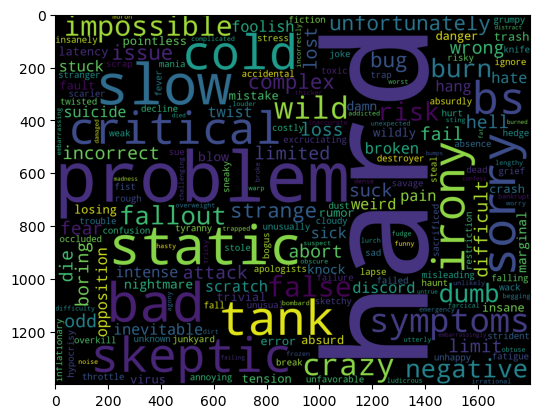

In [69]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud_neg_in_neg)

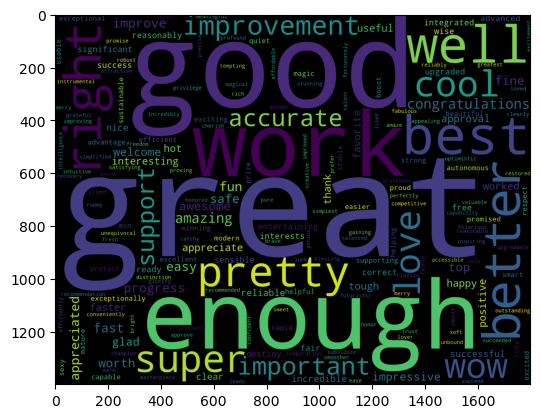

In [70]:
# Positive word cloud
# Choosing the only words which are present in positive words
text_pos_in_pos = " ".join ([w for w in words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(text_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)